In [1]:
import pandas as pd
df=pd.read_csv('train.csv')

In [2]:
df=df.drop(['Name', 'Ticket','PassengerId','Cabin'], axis=1).dropna()

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [4]:
X_=df.drop(['Survived'], axis=1).values
Y=df['Survived'].values

In [5]:
from sklearn import preprocessing

In [6]:
le_sex=preprocessing.LabelEncoder()
le_sex.fit(X_[:,1])
X_[:,1]=le_sex.transform(X_[:,1])
print('Sex labels: ')
for i in range(len(le_sex.classes_)):
    print('{}-->{}'.format(le_sex.classes_[i] ,le_sex.transform(le_sex.classes_)[i]))
print()

le_emb=preprocessing.LabelEncoder()
le_emb.fit(X_[:,-1])
X_[:,-1]=le_emb.transform(X_[:,-1])
print('Embarked labels: ')
for i in range(len(le_emb.classes_)):
    print('{}-->{}'.format(le_emb.classes_[i] ,le_emb.transform(le_emb.classes_)[i]))
print()

Sex labels: 
female-->0
male-->1

Embarked labels: 
C-->0
Q-->1
S-->2



In [7]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
X_ = StandardScaler().fit_transform(X_)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#2. Define Model
model=Sequential()
model.add(Dense(40,input_dim=X_.shape[1], activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
#3. Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


712/712 [==============================] - 0s 53us/step
Epoch:  50
Batch:  5
acc: 87.78089887640449%
712/712 [==============================] - 0s 51us/step
Epoch:  50
Batch:  6
acc: 88.90449438202246%
712/712 [==============================] - 0s 51us/step
Epoch:  50
Batch:  7
acc: 89.18539325842697%
712/712 [==============================] - 0s 50us/step
Epoch:  50
Batch:  8
acc: 89.04494382022472%
712/712 [==============================] - 0s 39us/step
Epoch:  50
Batch:  9
acc: 90.4494382022472%
712/712 [==============================] - 0s 55us/step
Epoch:  50
Batch:  10
acc: 90.87078651685393%
712/712 [==============================] - 0s 40us/step
Epoch:  50
Batch:  11
acc: 91.01123595505618%
712/712 [==============================] - 0s 37us/step
Epoch:  50
Batch:  12
acc: 91.01123595505618%
712/712 [==============================] - 0s 39us/step
Epoch:  50
Batch:  13
acc: 91.99438202247191%
712/712 [==============================] - 0s 50us/step
Epoch:  50
Batch:  14
acc: 90.87

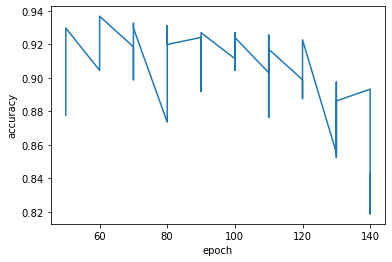

In [11]:
#4. Fit the model
ac=[]
ep=[]
bat=[]
for i in range(0,10):
    k=50+10*i
    for j in range(5,30):
        model.fit(X_,Y,validation_split=0.2, nb_epoch=k, batch_size=j, verbose=0)
        #5. Evaluate the model
        scores=model.evaluate(X_,Y)
        ep.append(k)
        ac.append(scores[1])
        bat.append(j)
        print('Epoch: ',k)
        print('Batch: ',j)
        print('{}: {}%'.format(model.metrics_names[1],scores[1]*100))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(ep,ac)

In [22]:
np.round(model.predict(X_[0:5]))

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

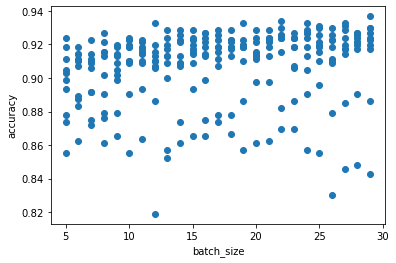

In [14]:
plt.xlabel('batch_size')
plt.ylabel('accuracy')
plt.scatter(bat,ac)

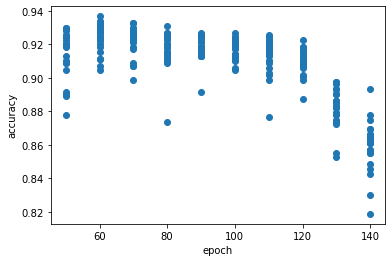

In [16]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.scatter(ep,ac)

In [23]:
Y[0:5]

array([0, 1, 1, 1, 0])

In [39]:
test=pd.read_csv('test.csv')
test=test.drop(['Name', 'Ticket','PassengerId','Cabin'], axis=1).dropna()
X_test=test.values
X_test
le_sex=preprocessing.LabelEncoder()
le_sex.fit(X_test[:,1])
X_test[:,1]=le_sex.transform(X_test[:,1])
print('Sex labels: ')
for i in range(len(le_sex.classes_)):
    print('{}-->{}'.format(le_sex.classes_[i] ,le_sex.transform(le_sex.classes_)[i]))
print()

le_emb=preprocessing.LabelEncoder()
le_emb.fit(X_test[:,-1])
X_test[:,-1]=le_emb.transform(X_test[:,-1])
print('Embarked labels: ')
for i in range(len(le_emb.classes_)):
    print('{}-->{}'.format(le_emb.classes_[i] ,le_emb.transform(le_emb.classes_)[i]))
print()

Sex labels: 
female-->0
male-->1

Embarked labels: 
C-->0
Q-->1
S-->2



In [43]:
np.round(model.predict(X_test[0:5]))

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)